In [2]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import math
from statistics import mean,stdev
from matplotlib import style
style.use('ggplot')

In [3]:
data = pd.read_csv("./data/browser-ww.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              157 non-null    object 
 1   Chrome            157 non-null    float64
 2   IE                157 non-null    float64
 3   Firefox           157 non-null    float64
 4   Safari            157 non-null    float64
 5   Opera             157 non-null    float64
 6   Android           157 non-null    float64
 7   UC Browser        157 non-null    float64
 8   Samsung Internet  157 non-null    float64
 9   Edge Legacy       157 non-null    float64
 10  Nokia             157 non-null    float64
 11  BlackBerry        157 non-null    float64
 12  IEMobile          157 non-null    float64
 13  Edge              157 non-null    float64
 14  NetFront          157 non-null    float64
 15  Yandex Browser    157 non-null    float64
 16  360 Safe Browser  157 non-null    float64
 1

In [4]:
data.tail()

,Date,Chrome,IE,Firefox,Safari,Opera,Android,UC Browser,Samsung Internet,Edge Legacy,...,AOL,SeaMonkey,Openwave,Phantom,Whale Browser,SonyEricsson,Pale Moon,Obigo,Jasmine,Other
152,2021-12,63.80,0.46,3.91,19.60,2.35,0.68,0.94,2.85,0.09,...,0.0,0.0,0.0,0.0,0.11,0.0,0.01,0.0,0.0,0.02
153,2022-01,63.06,0.45,4.18,19.84,2.33,0.65,0.89,2.89,0.08,...,0.0,0.0,0.0,0.0,0.12,0.0,0.01,0.0,0.0,0.22
154,2022-02,62.78,0.47,4.21,19.30,2.26,0.65,0.86,2.77,0.15,...,0.0,0.0,0.0,0.0,0.11,0.0,0.01,0.0,0.0,1.23
155,2022-03,64.53,0.38,3.40,18.84,2.22,0.64,0.82,2.82,0.13,...,0.0,0.0,0.0,0.0,0.12,0.0,0.01,0.0,0.0,0.93
156,2022-04,64.34,0.39,3.41,19.16,2.07,0.76,0.84,2.85,0.16,...,0.0,0.0,0.0,0.0,0.11,0.0,0.01,0.0,0.0,0.68


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Chrome'>)

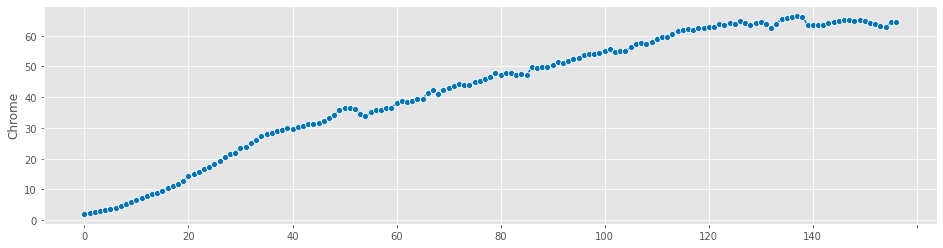

In [30]:
plot_series(data['Chrome'])

In [23]:
y_train, y_test = temporal_train_test_split(data['Chrome'], test_size=24)


In [31]:
from sktime.forecasting.ets import AutoETS
#model Error Trend Seasonal
aaa = AutoETS(error="add", trend="add", seasonal="add", sp = 12)
aaa.fit(y_train)

AutoETS(seasonal='add', sp=12, trend='add')

In [32]:
aaa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                 Chrome   No. Observations:                  133
Model:                       ETS(AAA)   Log Likelihood                -123.506
Date:                Sat, 14 May 2022   AIC                            283.012
Time:                        19:28:37   BIC                            335.039
Sample:                             0   HQIC                           304.154
                                - 133   Scale                            0.375
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.085     11.774      0.000       0.833       1.166
smoothing_trend         0.0544      0.038      1.422      0.155      -0.021       0.129
smoothing_seasonal       1e-08        nan        nan        nan         nan         nan
initial_level           1.4585   2716.323      0.001      1.000   -5322.438    5325.355
initial_trend           0.5921      0.204      2.903      0.004       0.192       0.992
initial_seasonal.0     -0.0230   2716.323  -8.46e-06      1.000   -5323.918    5323.872
initial_seasonal.1      0.1510   2716.325   5.56e-05      1.000   -5323.749    5324.051
initial_seasonal.2     -0.0882   2716.327  -3.25e-05      1.000   -5323.991    5323.815
initial_seasonal.3     -0.2241   2716.324  -8.25e-05      1.000   -5324.122    5323.674
initial_seasonal.4      0.0669   2716.323   2.46e-05      1.000   -5323.829    5323.962
initial_seasonal.5     -0.0707   2716.326   -2.6e-05      1.000   -5323.972    5323.831
initial_seasonal.6     -0.2295   2716.328  -8.45e-05      1.000   -5324.134    5323.675
initial_seasonal.7      0.0087   2716.328   3.21e-06      1.000   -5323.896    5323.913
initial_seasonal.8      0.1249   2716.327    4.6e-05      1.000   -5323.777    5324.027
initial_seasonal.9      0.1634   2716.327   6.01e-05      1.000   -5323.740    5324.067
initial_seasonal.10     0.0341   2716.327   1.26e-05      1.000   -5323.869    5323.938
initial_seasonal.11          0   2716.324          0      1.000   -5323.897    5323.897
===================================================================================
Ljung-Box (Q):                       30.35   Jarque-Bera (JB):                12.04
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               2.28   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [33]:
horizon = np.arange(1,25)
y_pred = aaa.predict(horizon)

*Прогноз*

In [34]:

y_pred

133    62.672052
134    62.959032
135    63.078312
136    63.119936
137    63.039482
138    63.356019
139    63.651363
140    63.518160
141    63.811848
142    64.208763
143    64.192585
144    64.373319
145    64.565224
146    64.852203
147    64.971483
148    65.013108
149    64.932653
150    65.249191
151    65.544535
152    65.411332
153    65.705020
154    66.101935
155    66.085757
156    66.266490
dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Chrome'>)

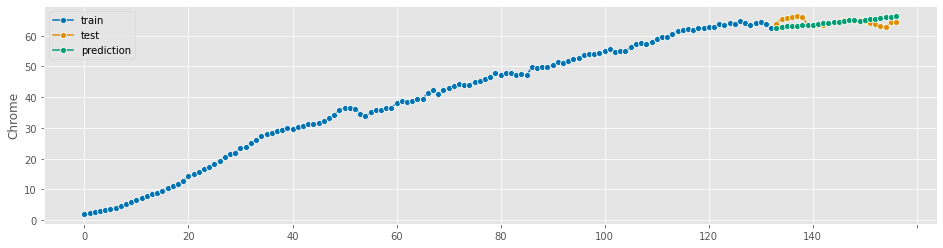

In [35]:

plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'prediction'])

*С Google Chrome получается правильно, а с EDGE Legacy - забавно*

In [38]:
import statsmodels.api as sm
GL = data['Chrome']

test_DF = sm.tsa.adfuller(GL)
print('adf:', test_DF[0])
print('p-value', test_DF[1])
print('critical values:', test_DF[4])
if test_DF[0] > test_DF[4]['5%']:
    print('есть единичные корни, ряд нестрационарен')
else:
    print('единичных корней нет, ряд стационарен')


GL_diff1 = GL.diff(periods=1).dropna()
test_DF_diff1 = sm.tsa.adfuller(GL_diff1)
print('adf:', test_DF_diff1[0])
print('p-value', test_DF_diff1[1])
print('critical values:', test_DF_diff1[4])
if test_DF_diff1[0] > test_DF_diff1[4]['5%']:
    print('есть единичные корни, ряд нестрационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf: -3.809940904458916
p-value 0.002807228504464499
critical values: {'1%': -3.4729792729247793, '5%': -2.8802520918255534, '10%': -2.5767469641683105}
единичных корней нет, ряд стационарен
adf: -11.005605724609858
p-value 6.516000716951478e-20
critical values: {'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}
единичных корней нет, ряд стационарен


In [45]:
test_KPSS = sm.tsa.kpss(GL)
print('KPSS:', test_KPSS[0])
print('p-value', test_KPSS[1])
print('critical values:', test_KPSS[3])
if test_KPSS[0] > test_KPSS[3]['5%']:
    print('есть детерминированнный тренд, ряд нестрационарен')
else:
    print('нет детерминированного тренда, ряд стационарен')

KPSS: 1.7688405179224866
p-value 0.01
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
есть единичные корни, ряд нестрационарен


/home/c0sta/PycharmProjects/1899_full_msu_courser_data_analisis/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


/home/c0sta/PycharmProjects/1899_full_msu_courser_data_analisis/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


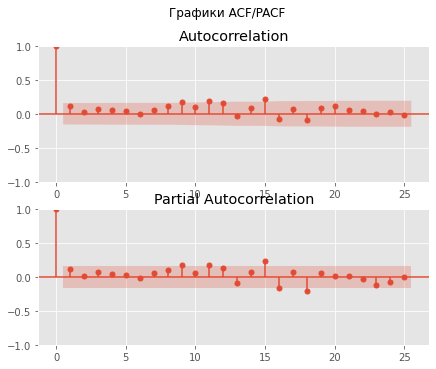

In [75]:
fig = plt.figure(figsize=(7,5.5))
fig.suptitle('Графики ACF/PACF')
ax3 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(GL_diff1, lags=25, ax = ax3)
ax4 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(GL_diff1, lags=25, ax = ax4)

In [71]:
model = sm.tsa.ARIMA(GL, order=(1,1,0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 Chrome   No. Observations:                  157
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -176.731
Date:                Sat, 14 May 2022   AIC                            357.462
Time:                        21:27:55   BIC                            363.561
Sample:                             0   HQIC                           359.939
                                - 157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3350      0.079      4.231      0.000       0.180       0.490
sigma2         0.5639      0.052     10.913      0.000       0.463       0.665
Ljung-Box (L1) (Q):                   6.74   Jarque-

<AxesSubplot:>

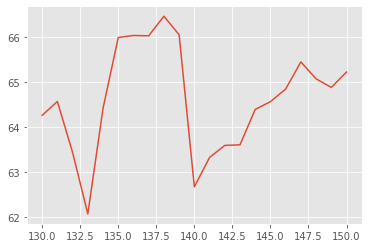

In [72]:
model.predict(start = 130, end = 150).plot()

<AxesSubplot:>

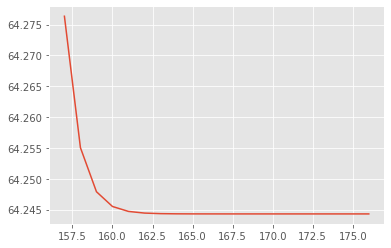

In [68]:
model.forecast(steps=20).plot()

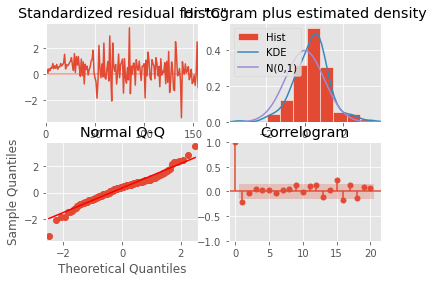

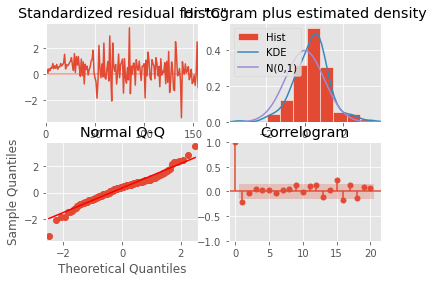

In [69]:
model.plot_diagnostics(lags=20)